In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset["train"], dataset["test"]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHI9KLD/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHI9KLD/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_dataset, test_dataset = train_dataset.cache(), test_dataset.cache()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
def normalize(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

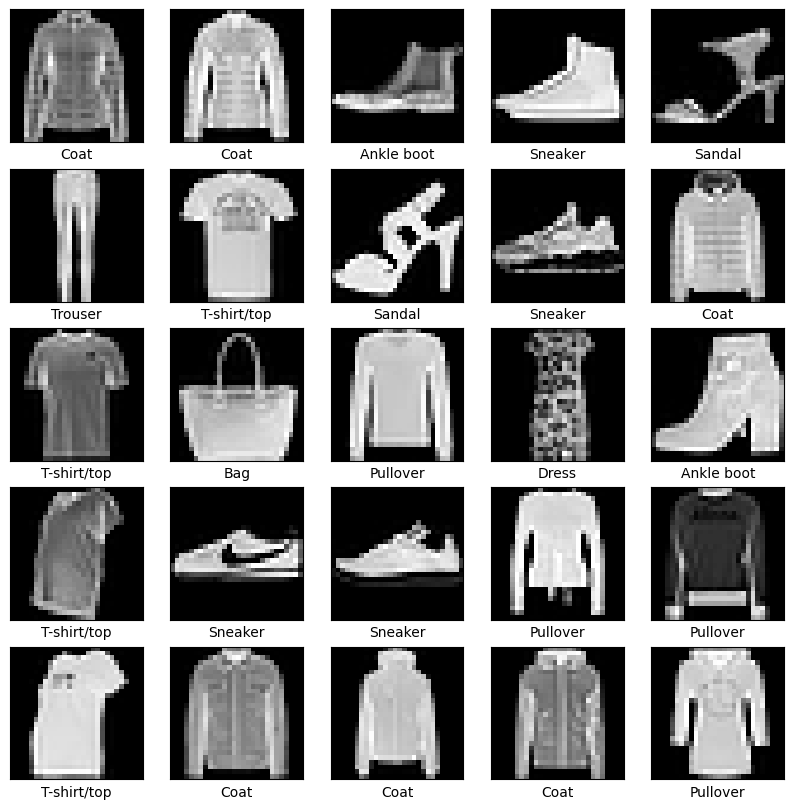

In [7]:
n_row, n_col = 5, 5
fig = plt.figure(figsize=(10, 10))



for idx, (image, label) in enumerate(test_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5,5,idx + 1)
  plt.imshow(image, cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[label])
  plt.grid(False)

In [8]:
num_samples_training = metadata.splits["train"].num_examples
num_samples_test = metadata.splits["test"].num_examples
print(f"Training samples: {num_samples_training}\nTest samples: {num_samples_test}")

Training samples: 60000
Test samples: 10000


In [9]:
BATCH_SIZE = 32
epochs = 10

train_dataset = train_dataset.cache().repeat().shuffle(num_samples_training).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [11]:
model = Sequential(layers=[
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2,2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation="relu"),
    MaxPooling2D((2,2), strides=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
])

In [12]:
model.compile(optimizer = "adam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")

In [13]:
history = model.fit(train_dataset, epochs=epochs, steps_per_epoch=int(num_samples_training/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 25s 4ms/step - loss: 0.4095 - accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2651 - accuracy: 0.9033
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2161 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1803 - accuracy: 0.9329
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1577 - accuracy: 0.9414
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1325 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1138 - accuracy: 0.9577
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0969 - accuracy: 0.9634
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0842 - accuracy: 0.9680
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.07

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=int(num_samples_test))
print(f"Accuracy: {test_accuracy}")

10000/10000 [==============================] - 1s 115us/step - loss: 0.3008 - accuracy: 0.9206
Accuracy: 0.9205999970436096


In [32]:
for test_image, test_label in test_dataset.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predict_image = model.predict(test_image)

1/1 [==============================] - 0s 46ms/step


In [38]:
np.argmax(predict_image[1]), test_label[1]
predict_image[1, 4]

0.9919143

In [53]:
def plot_image(i, predict_array, image, true_label):
  predict_array, img, true_label = predict_array[i], image[i], true_label[i]

  predict_label = np.argmax(predict_array)
  plt.imshow(img[:], cmap="gray")
  if predict_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% : (True {})".format(class_names[predict_label],
                                              predict_array[predict_label] * 100,
                                              class_names[true_label]),
             color=color)

  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

def plot_predict_percent(i, predict_array, true_label):
  predict_array, true_label = predict_array[i], true_label[i]

  predict_label = np.argmax(predict_array)

  plot = plt.bar(range(10), predict_array, color="#e5e7eb")
  plt.ylim([0, 1])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plot[predict_label].set_color("red")
  plot[true_label].set_color("blue")

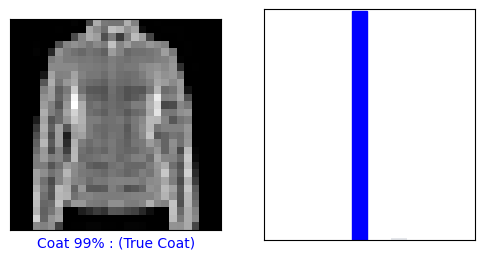

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predict_image, test_image, test_label)
plt.subplot(1, 2, 2)
plot_predict_percent(i, predict_image, test_label)

In [ ]:
n_row, n_col = 3, 3
plt.figure(figsize=(10, 10))

for i in range(10):
  plt.subplot(n_row, n_col, i)